# Entanglement Classifier Trial Notebook

### Importing Dependencies

In [1]:
import numpy as np
from sympy.physics.quantum import TensorProduct

from components.system import System
from components.connection import ConnectionFactory, Connection
from components.model import Model
from components.connection_functions import DrivenCascadeFunction, EnergyExchangeFunction
from components.state_generator import generatePureState, generateMixedState, generateMixedStateUsingPure

### Setting up the system

In [2]:
reservoir_nodes=4
system_nodes=1

In [3]:
"""
Defining System setup
"""
random_num = np.random.rand()

if random_num >= 0.5:
    system_state = generateMixedStateUsingPure()
elif random_num < 0.5:
    system_state = generatePureState()
system_node_list = [0]

if len(system_node_list) != system_nodes:
    raise Exception

system_connections = {}

system = System(
    init_quantum_state=system_state, nodes=system_node_list, connections=system_connections
)

### Setting up the interface

In [4]:

"""
Defining Interface setup
"""

interfaceFactory = ConnectionFactory(DrivenCascadeFunction, gamma_1=10, gamma_2=10)

In [5]:
connection = interfaceFactory.generateConnection(0, 1, 2)

### Setting up the reservoir

In [6]:
"""
Defining Reservoir setup
"""

reservoirFactory = ConnectionFactory(EnergyExchangeFunction, is_hamiltonian=True, J=0.5)

### Setting up the model

In [7]:
model = Model()
model.setSystem(system)
model.setReservoirConnectionFac(reservoirFactory)
model.setInterfaceConectionFac(interfaceFactory)
model.generateReservoir(reservoir_nodes, init_quantum_state=0, connection_rate=1)
model.generateInterface(connection_rate=.5)
model.setRunDuration(10)
model.setRunResolution(0.01)


### Running the model

In [8]:
pure_state = np.array([[1, 0], [0, 0]])
mixed_state = np.array([[0.5, 0], [0, 0.5]])

In [9]:
model.system.init_quantum_state = pure_state
model.run()

In [10]:
log1 = model.modelLog

In [11]:
model.system.init_quantum_state = pure_state
model.setKillInterfaceTime(1)
model.run()

Interface connections killed


In [12]:
log2 = model.modelLog

### Plotting results

C:\Users\mmack\anaconda3\envs\entanglement_classifier\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


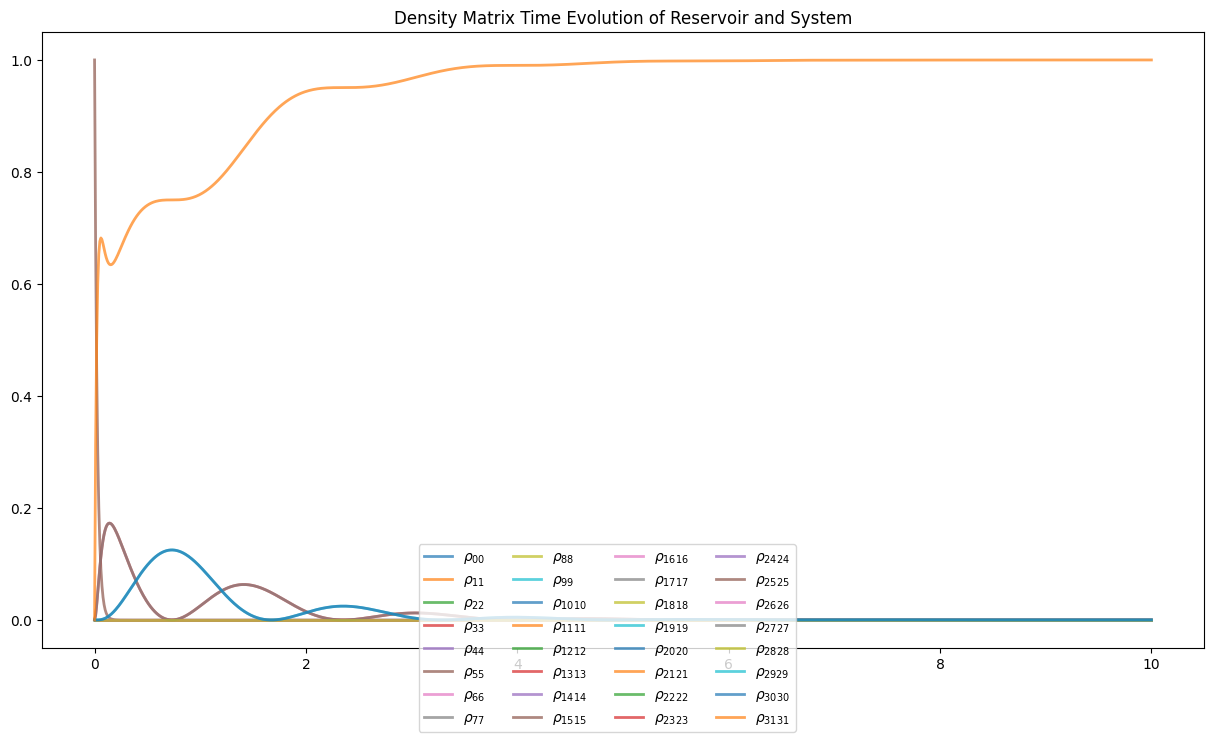

In [19]:
log1.plotResAndSys()

C:\Users\mmack\anaconda3\envs\entanglement_classifier\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


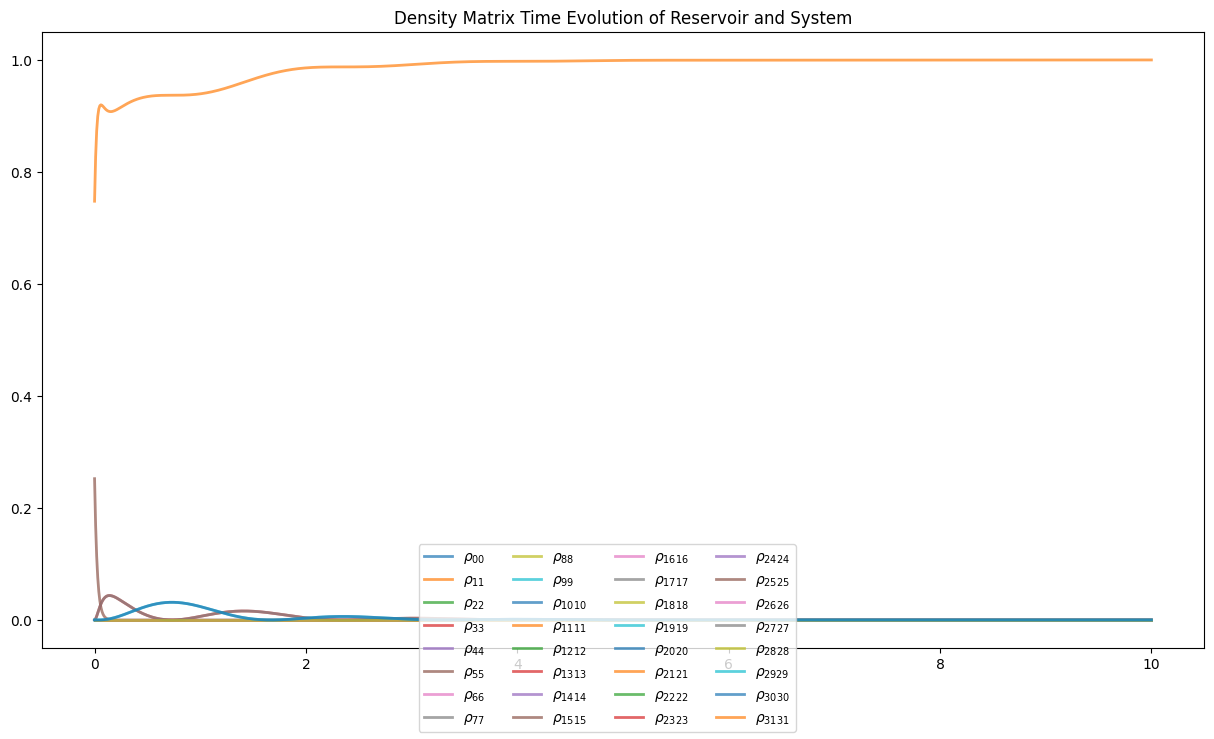

In [20]:
log2.plotResAndSys()

C:\Users\mmack\anaconda3\envs\entanglement_classifier\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


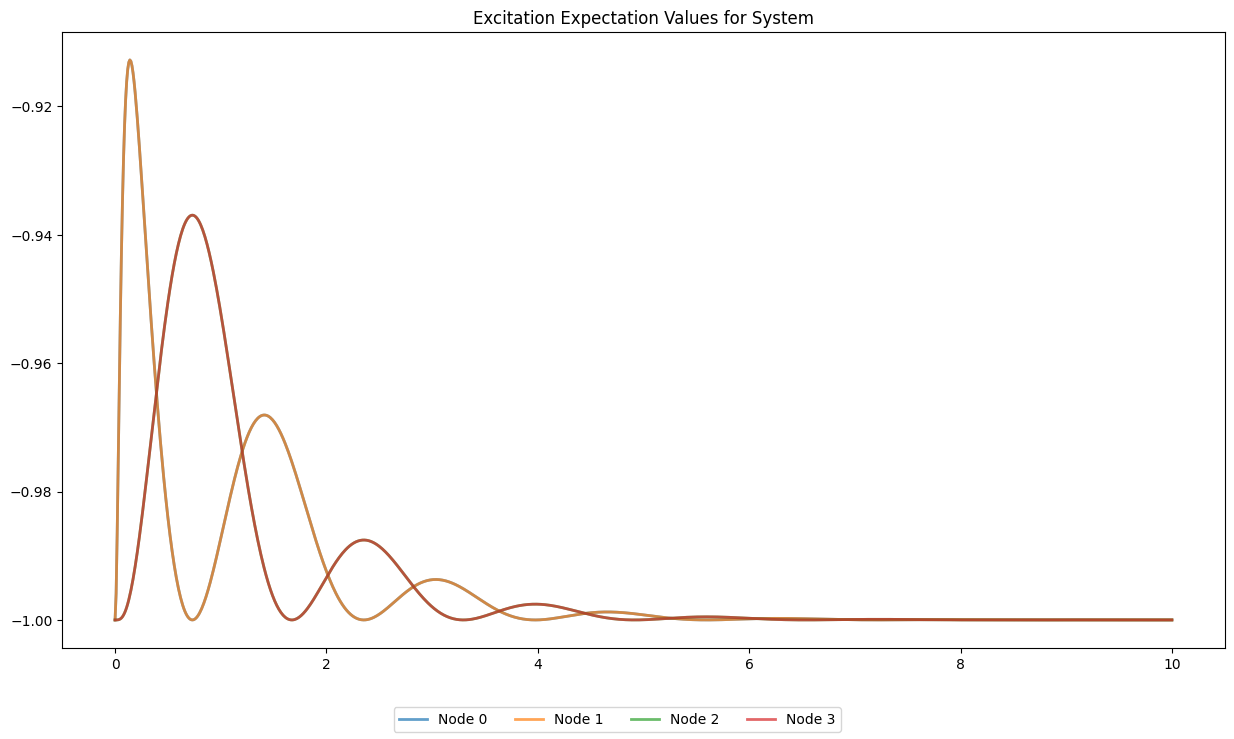

In [15]:
log2.plotExcite()